# Preparing the Data

In [ ]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(1)

In [ ]:
# Dependencies
import numpy as np
import pandas as pd
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Creates a new column for rating, from bad-average-good
reviews = []
for i in wine['quality']:
    if i >= 1 and i <= 3:
        reviews.append('bad')
    elif i >= 4 and i <= 7:
        reviews.append('average')
    elif i >= 8 and i <= 10:
        reviews.append('good')
wine['rating'] = reviews
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,average
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average


# Logistic Regression Model

In [ ]:
# Set quality column for y values
X = wine.drop(["quality", "rating"], axis=1)
y = wine["rating"]
print(X.shape, y.shape)

(1599, 11) (1599,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25)

In [ ]:
# Standard scaling
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model_predict = model.predict(X_test)

In [ ]:
model_conf_matrix = confusion_matrix(y_test, model_predict)
model_acc_score = accuracy_score(y_test, model_predict)
print(model_conf_matrix)
print("Accuracy: "+str(model_acc_score*100)+"%")

[[396   0   0]
 [  1   0   0]
 [  3   0   0]]
Accuracy: 99.0%


# Deep Learning Model

In [ ]:
X = wine.drop(["quality", "rating"], axis=1)
y = wine["rating"]
print(X.shape, y.shape)

(1599, 11) (1599,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25)

In [ ]:
# Using MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [ ]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=8, activation='relu', input_dim=11))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [ ]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
38/38 - 1s - loss: 1.1628 - accuracy: 0.2619
Epoch 2/100
38/38 - 0s - loss: 0.7007 - accuracy: 0.9766
Epoch 3/100
38/38 - 0s - loss: 0.3645 - accuracy: 0.9800
Epoch 4/100
38/38 - 0s - loss: 0.2137 - accuracy: 0.9800
Epoch 5/100
38/38 - 0s - loss: 0.1597 - accuracy: 0.9800
Epoch 6/100
38/38 - 0s - loss: 0.1381 - accuracy: 0.9800
Epoch 7/100
38/38 - 0s - loss: 0.1287 - accuracy: 0.9800
Epoch 8/100
38/38 - 0s - loss: 0.1244 - accuracy: 0.9800
Epoch 9/100
38/38 - 0s - loss: 0.1223 - accuracy: 0.9800
Epoch 10/100
38/38 - 0s - loss: 0.1212 - accuracy: 0.9800
Epoch 11/100
38/38 - 0s - loss: 0.1207 - accuracy: 0.9800
Epoch 12/100
38/38 - 0s - loss: 0.1203 - accuracy: 0.9800
Epoch 13/100
38/38 - 0s - loss: 0.1201 - accuracy: 0.9800
Epoch 14/100
38/38 - 0s - loss: 0.1198 - accuracy: 0.9800
Epoch 15/100
38/38 - 0s - loss: 0.1197 - accuracy: 0.9800
Epoch 16/100
38/38 - 0s - loss: 0.1194 - accuracy: 0.9800
Epoch 17/100
38/38 - 0s - loss: 0.1191 - accuracy: 0.9800
Epoch 18/100
38/38 - 0s

In [ ]:
# Quantify model
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy*100}%")

13/13 - 0s - loss: 0.0596 - accuracy: 0.9900
Normal Neural Network - Loss: 0.059639204293489456, Accuracy: 99.00000095367432%


# Models for exact quality score
A tree model and a deep learning model that attempt to determine the numerical score from 3-8 for the wines in the data set

## Trees Model for exact quality score

In [ ]:
from sklearn import tree
target = wine["quality"]

In [ ]:
data = wine.drop(["quality", "rating"], axis=1)
feature_names = data.columns
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.57

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
print(f"Accuracy: {rf.score(X_test, y_test)*100}%")

Accuracy: 67.5%


In [ ]:
# Determine which variables are least important
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.14540053067700837, 'alcohol'),
 (0.1157371938255992, 'sulphates'),
 (0.10529261941606942, 'total sulfur dioxide'),
 (0.10260343362817143, 'volatile acidity'),
 (0.09139598008375867, 'density'),
 (0.08362098997880432, 'chlorides'),
 (0.07358834547986286, 'pH'),
 (0.07219355776211514, 'fixed acidity'),
 (0.0716697491968824, 'citric acid'),
 (0.07133355280238213, 'residual sugar'),
 (0.06716404714934614, 'free sulfur dioxide')]

## Deep Learning Model for exact quality score

In [ ]:
# Drop the quality columns, and the free sulfur dioxide as it is the least important
X = wine.drop(["quality", "rating", "free sulfur dioxide"], axis=1)
y = wine["quality"]
print(X.shape, y.shape)

(1599, 10) (1599,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

In [ ]:
# Using MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [ ]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [ ]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=300, activation='relu', input_dim=10))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=6, activation='softmax'))

In [ ]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 300)               3300      
_________________________________________________________________
dense_4 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_9 (Dense)              (None, 8)                

In [ ]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=200,
    shuffle=True,
    verbose=2
)

Epoch 1/200
43/43 - 1s - loss: 1.5668 - accuracy: 0.4150
Epoch 2/200
43/43 - 0s - loss: 1.3516 - accuracy: 0.4444
Epoch 3/200
43/43 - 0s - loss: 1.2771 - accuracy: 0.4702
Epoch 4/200
43/43 - 0s - loss: 1.2099 - accuracy: 0.5202
Epoch 5/200
43/43 - 0s - loss: 1.1041 - accuracy: 0.5894
Epoch 6/200
43/43 - 0s - loss: 1.0874 - accuracy: 0.5659
Epoch 7/200
43/43 - 0s - loss: 1.0415 - accuracy: 0.5901
Epoch 8/200
43/43 - 0s - loss: 1.0357 - accuracy: 0.5968
Epoch 9/200
43/43 - 0s - loss: 1.0229 - accuracy: 0.5946
Epoch 10/200
43/43 - 0s - loss: 0.9998 - accuracy: 0.5901
Epoch 11/200
43/43 - 0s - loss: 0.9946 - accuracy: 0.5968
Epoch 12/200
43/43 - 0s - loss: 0.9787 - accuracy: 0.6071
Epoch 13/200
43/43 - 0s - loss: 0.9792 - accuracy: 0.5975
Epoch 14/200
43/43 - 0s - loss: 0.9528 - accuracy: 0.6130
Epoch 15/200
43/43 - 0s - loss: 0.9520 - accuracy: 0.6078
Epoch 16/200
43/43 - 0s - loss: 0.9458 - accuracy: 0.6093
Epoch 17/200
43/43 - 0s - loss: 0.9556 - accuracy: 0.5975
Epoch 18/200
43/43 - 0s

In [ ]:
# Quantify model
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy*100}%")

8/8 - 0s - loss: 3.5017 - accuracy: 0.6500
Normal Neural Network - Loss: 3.501667022705078, Accuracy: 64.99999761581421%


# Charts

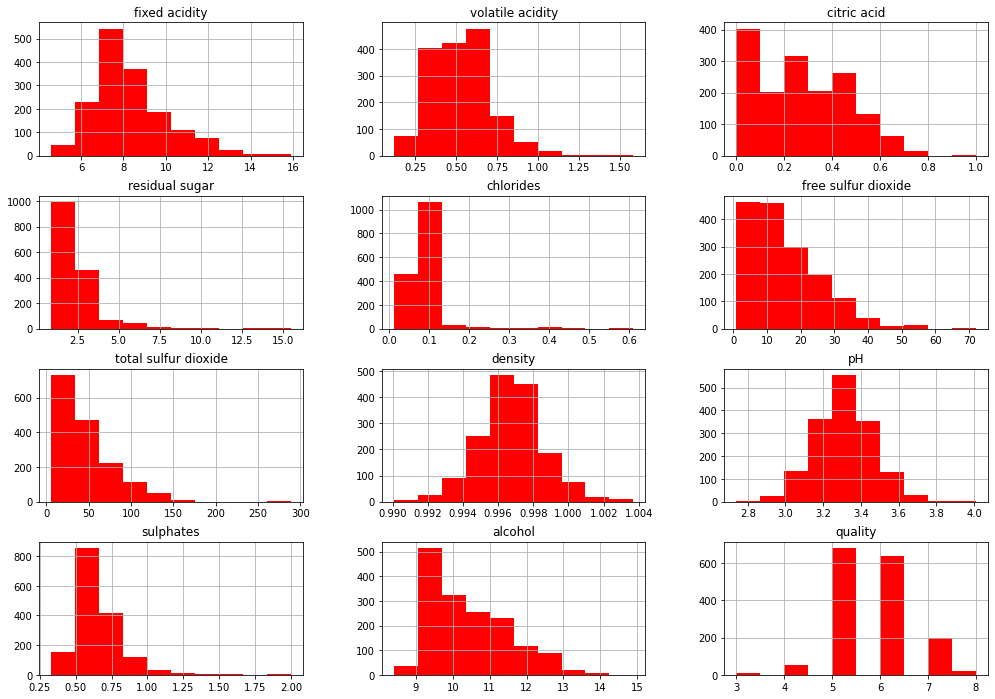

In [ ]:
wine.hist(figsize=(17,12),color='Red')
plt.show()

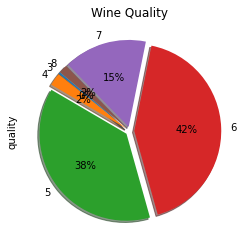

In [ ]:
explode = (0.05, 0.05, 0.05, 0.05, .05, .05)
pie_chart_data = wine.groupby('quality')['quality'].sum().plot(kind = "pie", autopct="%1.0f%%", explode=explode, shadow=True, startangle=140)
pie_chart_data
plt.title("Wine Quality")

# Save the figure
plt.savefig("Pie Chart is for  average votes as per Genre.png")
plt.show()

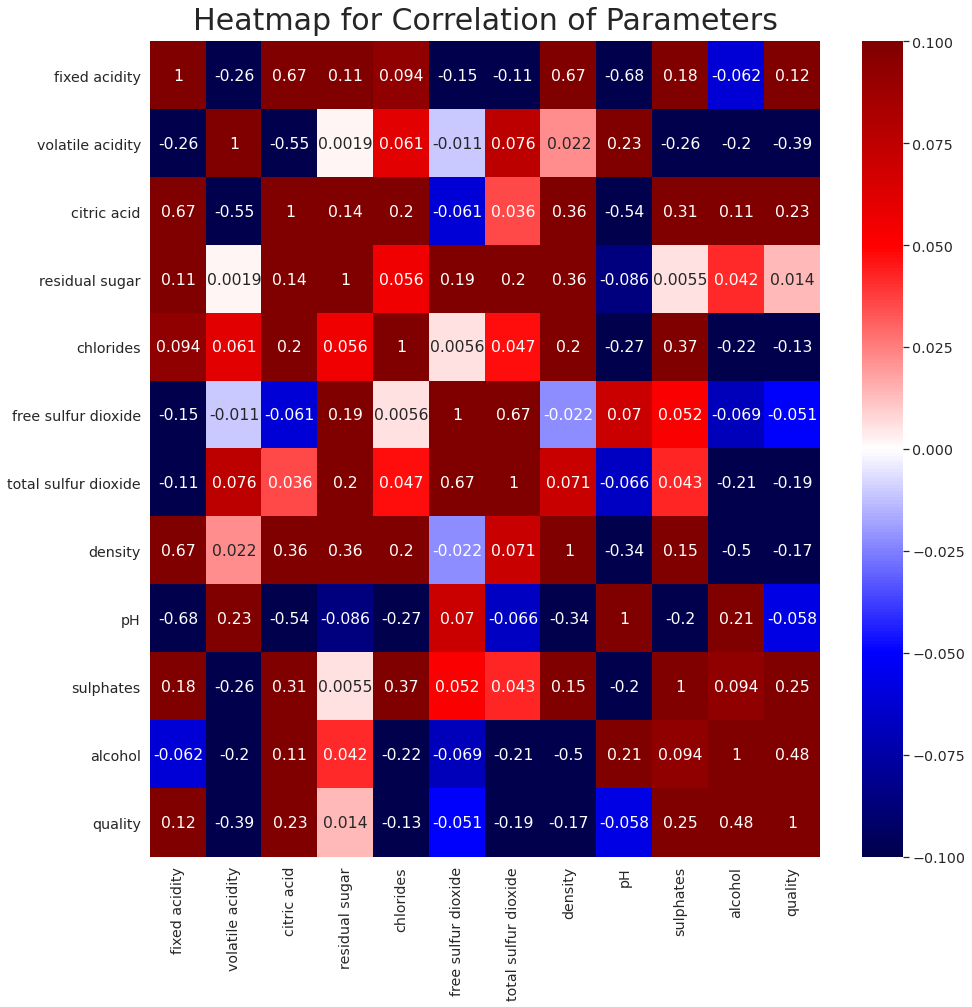

In [ ]:
corr = wine[wine.columns].corr()
plt.figure(figsize=(15, 15))
sns.set(font_scale=1.3)
sns.heatmap(corr, cmap="seismic", annot = True, vmin=0, vmax=0)
plt.title('Heatmap for Correlation of Parameters', fontdict={'fontsize':30}, pad=12)
plt.show()